# Linear Regression
**Regression models make the use of features to understand the relationship among the continuous features and the output variable. That is, they use the pattern that is learned to determine the value of the new data points.**

- **Objective:** Predicts a continuous numerical value based on input features.
- **Output:** Continuous values (real numbers).
- **Example Problem:** Predicting house prices based on size, location, and other features

## Case Scenario: Predicting House Prices
**Imagine you are working for a real estate company that wants to help clients estimate house prices based on certain features. You are tasked with building a regression model using historical housing data to predict the price of a house.**

### Define the Problem
- **Objective: Predict house prices based on features like:** *Square footage.* 
     - Number of bedrooms.
     - Number of bathrooms.
     - Location (e.g., city or zip code).

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Load data
data = pd.read_csv("House Price India.csv")
df = pd.DataFrame(data)

In [19]:
print(df.columns)

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')


In [60]:
# Get the first five rows 
df.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,House Age,Renovation Age
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,122003,52.8645,-114.557,2880,5400,2,58,2380000,94,2015
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,122004,52.8878,-114.470,2470,4000,2,51,1400000,106,2015
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,122004,52.8852,-114.468,2940,6600,1,53,1200000,76,2015
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,122005,52.9532,-114.321,3350,42847,3,76,838000,14,2015
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,122006,52.9047,-114.485,2060,4500,1,51,805000,86,2015


In [23]:
# Get basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [25]:
# Check for missing values
df.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [27]:
#check Duplicate values
df.duplicated().sum()

np.int64(0)

In [28]:
# Summary statistics
print(df.describe())

                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791962e+04          0.540239            0.087193 

In [35]:
# Drop Date Column 
df = df.drop('Date', axis=1)

In [37]:
# Feature Engineering: Age of the house
df["House Age"] = df["Built Year"].max() - df["Built Year"]
df['Renovation Age'] = df["Built Year"].max() - df['Renovation Year']

### Understanding Features (X) and Target (y)
**In any supervised learning task, the dataset consists of two main components:**

- **Features (X):** These are the input variables that are used to predict the target. In the case of predicting house prices, features are the characteristics of the house such as:
   - Number of bedrooms
   - Square footage of the living area
   - Lot size
   - Age of the house
   - Location (like postal code, latitude, longitude, etc.)
     
   
- **Target (y): This is the output or the variable you want to predict. In your case, the target is the Price of the house.**

### Why Split the Dataset?
- In supervised learning, we use the features (X) to make predictions about the target (y). The features contain the information that will help the machine learning model learn the relationship with the target.

- We separate these two components so that the model can learn the mapping from X (inputs) to y (output). Here's why we do it:

  - **X (Features):** These are the predictors (independent variables), which will help the model learn patterns or relationships that influence the target variable (Price). These features will be fed into the model to predict the price.

  - **y (Target):** This is the variable we want to predict. The machine learning model will try to map the inputs (X) to the correct output (y), in this case, the house price.

In [38]:
# Split the dataset into features (X) and target (y)
X = df.drop('Price', axis=1)  # X contains all columns except 'Price'
y = df['Price']  # y is the 'Price' column

### Splitting the Data into Training and Test Sets
- It’s important to separate the data into training and testing sets to evaluate the performance of the model.

In [39]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Regression Model

In [40]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluate the Model
- Here we are using Mean Squared Error (MSE) and R-squared to evaluate the model’s performance.

### 1. Mean Squared Error (MSE)

**MSE** measures the average squared difference between the predicted values and the actual values (i.e., how far off the model's predictions are from the true values). It tells you how well your model is predicting the target variable.

#### Why MSE?
- **Penalizes larger errors**: Squaring the differences between the predicted and actual values means that large errors are penalized more than small ones. This helps to highlight models that make big prediction mistakes, ensuring that they are corrected.
- **Provides a magnitude of error**: It gives you a single number that represents the **overall magnitude** of errors in the model’s predictions.

#### Formula for MSE:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
- \( y_i \) is the actual value (true value),
- \( \hat{y}_i \) is the predicted value,
- \( n \) is the number of data points (observations).

#### Interpretation:
- **Low MSE**: Indicates that the model's predictions are close to the true values.
- **High MSE**: Indicates that the model's predictions are far from the true values, suggesting poor performance.

#### Why it matters:
- **Comparing different models**: If you want to compare multiple models (e.g., Linear Regression vs. Random Forest), MSE can help you determine which model has the smallest prediction error. A lower MSE means a better model in terms of prediction accuracy.

---

### 2. R-squared (R²)

**R-squared** (often called the **coefficient of determination**) is a measure that indicates how well the features in your model explain the variance in the target variable. It tells you what proportion of the variance in the dependent variable (target) is explained by the independent variables (features).

#### Why R-squared?
- **Explains the variance**: R-squared gives an idea of how well the independent variables (features) explain the variability of the dependent variable (target). In simpler terms, it answers the question: "How much of the target variable's behavior can we explain with the features we are using?"
- **Ease of interpretation**: R-squared is easy to interpret because it is a percentage. For example, an R-squared of 0.80 means that 80% of the variance in the target variable is explained by the model, and the remaining 20% is unexplained.

#### Formula for R-squared:
$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value,
- \( \bar{y} \) is the mean of the actual values.

#### Interpretation:
- **R² = 1**: The model perfectly explains the variability of the target variable.
- **R² = 0**: The model does not explain any of the variability of the target variable (meaning it performs no better than predicting the mean of the target variable).
- **R² < 0**: A negative R-squared indicates that the model is worse than simply predicting the mean value (i.e., it is a poor model).

#### Why it matters:
- **Model fit**: R-squared provides a sense of how well your features fit the data. A higher R-squared means that the model captures more of the variance in the target variable.
- **Good for comparison**: R-squared is useful when comparing models that use the same target variable to see which one better explains the variability in the target.

---

### Why Use Both Metrics Together?

#### MSE and R-squared complement each other:
- **MSE** tells you about the **absolute accuracy** of your predictions — how close the predicted values are to the actual values.
- **R-squared** tells you how well the model explains the variance of the target — essentially, how much of the variability in the target is captured by the model.

#### Here’s why it's important to use both:
1. **MSE for error magnitude**: MSE gives a clear understanding of how far off your predictions are in terms of actual values (useful for comparing models that are very similar in terms of prediction errors).
2. **R-squared for model fit**: R-squared helps you understand how much your model is **explaining** the variation in the target variable. It tells you whether your model is a good fit to the data.

#### Example:
Let's say you have two models:
- Model A has an **MSE of 1000** and **R-squared of 0.85**.
- Model B has an **MSE of 800** and **R-squared of 0.70**.

Model B has a lower MSE (indicating better prediction accuracy), but Model A explains **more** of the variance in the target variable, as shown by its higher R-squared value. So, even though Model B predicts more accurately, Model A is better at capturing the relationship between features and target.

In such a case, the decision of which model is better depends on whether you prioritize **prediction accuracy** (lower MSE) or **explanatory power** (higher R-squared).

---

### Summary of When to Use MSE and R-squared

- **Use MSE** when you care about the **absolute error** and want to minimize the discrepancy between actual and predicted values. MSE gives you the magnitude of error and helps you compare models based on their accuracy.
  
- **Use R-squared** when you care about how much of the **variance** in the target variable your model explains. R-squared helps you evaluate how well the model fits the data.

Both together provide a fuller picture of your model’s performance:
- **MSE** helps you assess the magnitude of error.
- **R-squared** helps you evaluate the proportion of variance explained.


In [41]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 35028996835.7822
R-squared: 0.7514245120789134


### Visualizing the Predictions

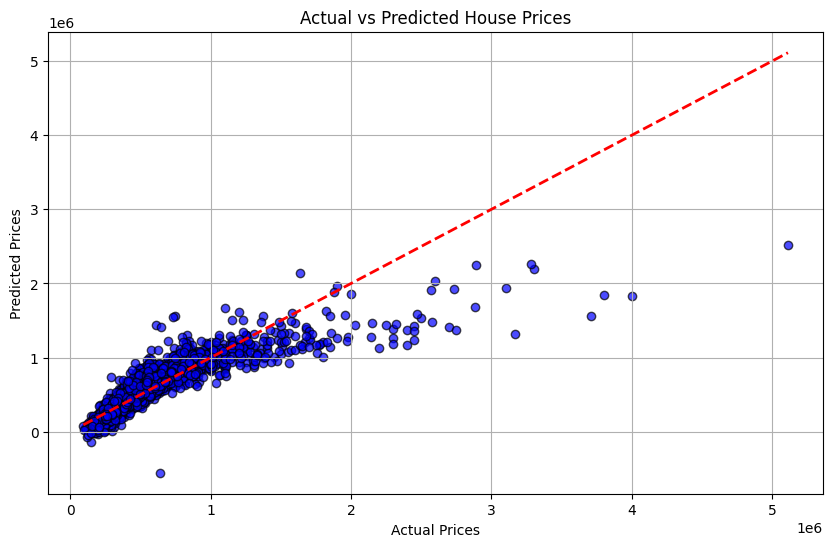

In [49]:
# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

**The red dashed line represents the ideal line (where predicted values exactly match actual values). The scatter points show how close your predictions are to the actual prices. The closer the points are to the red line, the better the model.**

### **What Are Residuals in Regression?**

In the context of regression, **residuals** are the **differences between the observed (actual) values and the predicted values** from your model. In simple terms, they represent how much the model's predictions deviate from the real data.

#### **Mathematically**, residuals are calculated as:

\[
\text{Residual} = \text{Actual Value} - \text{Predicted Value}
\]

Where:
- **Actual Value** (or observed value): The true value in the dataset (e.g., the actual house price).
- **Predicted Value**: The value predicted by the regression model (e.g., the price predicted by your model).

### **Why Are Residuals Important?**

Residuals are useful for understanding how well your model is performing.The goal of any regression model is to make predictions as close to the actual values as possible, and residuals help you assess how well the model has accomplished that. Here’s why they are important:

1. **Model Fit Evaluation**: 
   - If your model is perfect, the residuals will all be **zero** (or very close to zero). This means the predicted values exactly match the actual values.
   - The **smaller the residuals**, the better your model’s predictions align with reality.

2. **Pattern Detection**:
   - Residuals help you detect patterns in your model’s errors. If the residuals are randomly scattered around zero (the **horizontal line at 0 residuals**), then the model is likely a good fit.
   - If there is a pattern (e.g., a funnel shape, systematic curvature, etc.), it might indicate that the model is misspecified (e.g., a linear model might not be the best for non-linear data).

3. **Detecting Outliers**: 
   - Large residuals can indicate **outliers** in the data (e.g., extreme values of `Price` that the model is unable to predict correctly).

4. **Assumption Check**: 
   - For linear regression models, one assumption is that the residuals should be **normally distributed** (this is why we often check the distribution of residuals). Non-normal residuals can suggest that the model doesn't capture the underlying data structure correctly.

### **How Do Residuals Relate to Your Dataset?**

In your dataset (with `Price` as the target), residuals help you understand:
- **How close** your predicted house prices are to the actual prices in the test set.
- **Where** the model is making the most significant errors (for example, if there are consistently large residuals for certain price ranges).
- Whether your regression model is making reasonable predictions or if it has systematic errors (like predicting lower prices when they should be higher, or vice versa).

### **Conclusion**

To summarize:
- **Residuals** are the differences between the actual values and predicted values.
- They give insight into how well your regression model is performing.
- **Small residuals** indicate good predictions, while **large residuals** suggest the model is missing key patterns in the data.

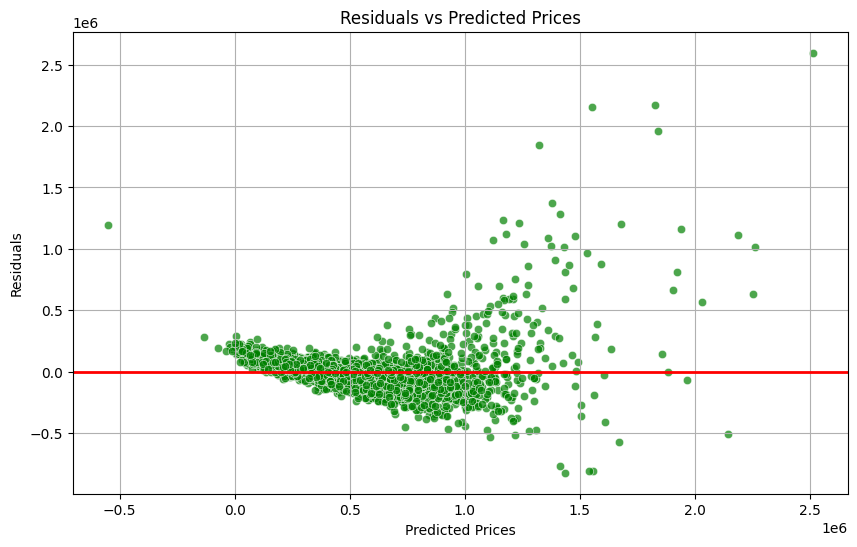

In [55]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot (Predicted vs Residuals)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', lw=2)  # Zero line for reference
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.grid(True)
plt.show()

**In a good model, residuals should be randomly scattered around zero. If you see any pattern (e.g., a funnel shape), this might indicate a problem with your model or feature selection.**

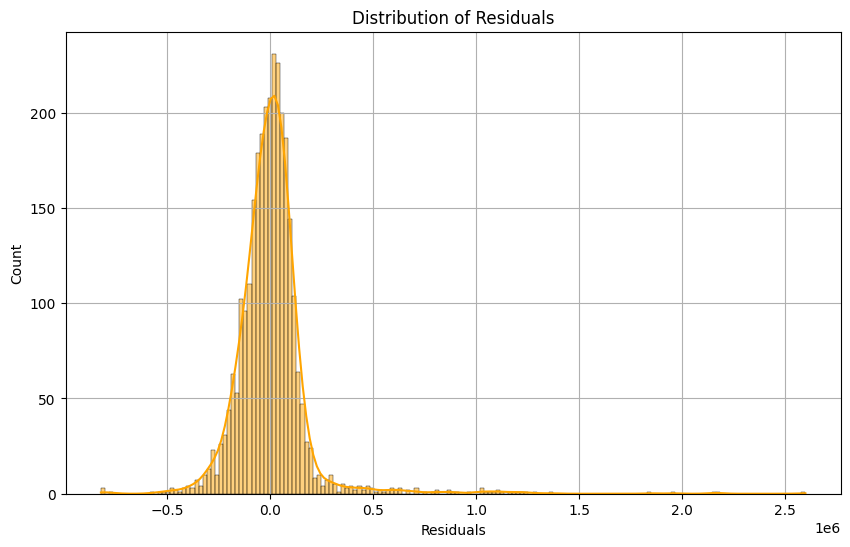

In [56]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

**Residuals should ideally be normally distributed around 0. If not, the model might need to be improved.**

C:\Users\khush\AppData\Local\Temp\ipykernel_10336\25182835.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual Prices', color='blue', shade=True)
C:\Users\khush\AppData\Local\Temp\ipykernel_10336\25182835.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted Prices', color='red', shade=True)


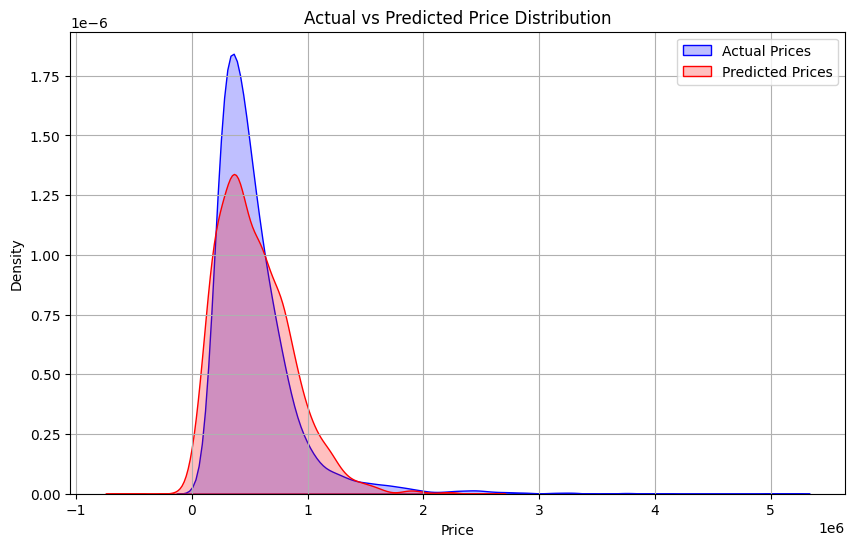

In [57]:
# Compare Actual vs Predicted Price Distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', color='blue', shade=True)
sns.kdeplot(y_pred, label='Predicted Prices', color='red', shade=True)
plt.title('Actual vs Predicted Price Distribution')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**In a good model, the predicted price distribution should closely match the actual price distribution. Any significant difference suggests the model isn't capturing the distribution of prices well.**

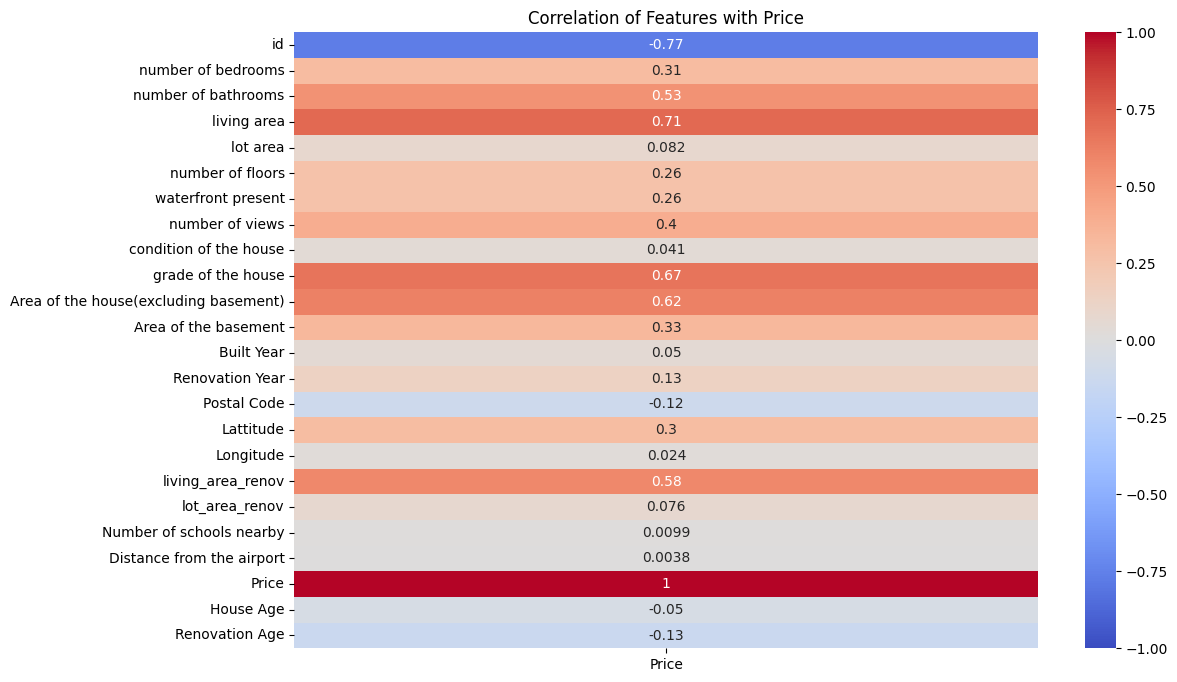

In [58]:
# Correlation Heatmap for Feature-Target Relationships
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Price')
plt.show()

**The heatmap shows the correlation between each feature and the target Price. High correlation (either positive or negative) indicates that the feature is highly influential in predicting the price. For example, living area and Area of the house may have a strong correlation with the price.**

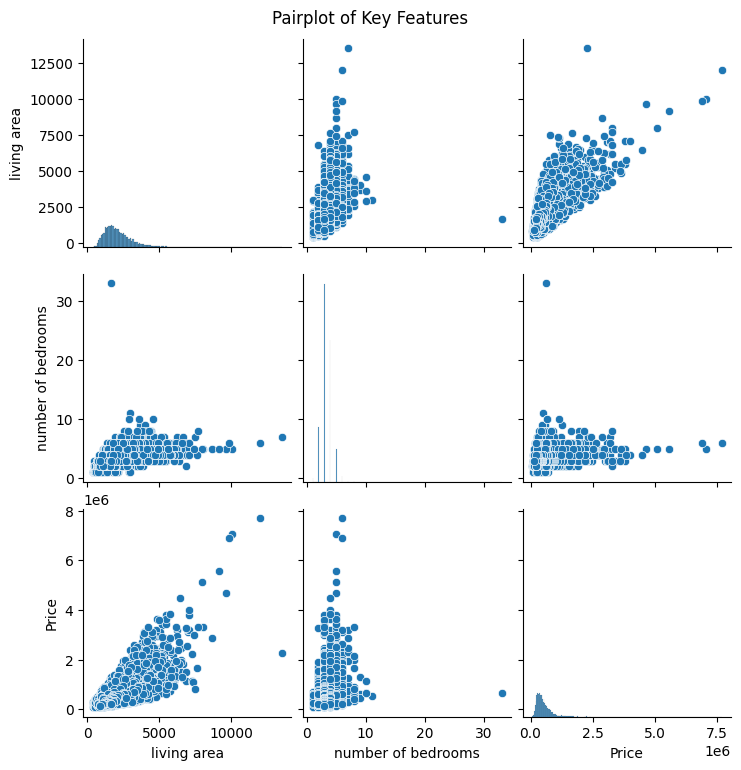

In [59]:
# Pairplot of key features (for example: living area, number of bedrooms, price)
key_features = ['living area', 'number of bedrooms', 'Price']
sns.pairplot(df[key_features])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

**The pairplot helps visualize relationships between key features (e.g., living area, number of bedrooms) and how they interact with Price. Strong linear relationships are ideal for regression models.**

### Summary of Visualizations:

- **Actual vs Predicted Scatter Plot:** Check prediction accuracy.
- **Residual Plot:** Diagnose model error.
- **Residual Distribution:** Ensure errors are normally distributed.
- **Predicted vs Actual Distribution:** Compare price distributions.
- **Correlation Heatmap:** Examine relationships between features and target.
- **Pairplot:** Investigate interactions between key features.